ASSIGNMENT 01<br>2019/E/136<br>16 5 2023

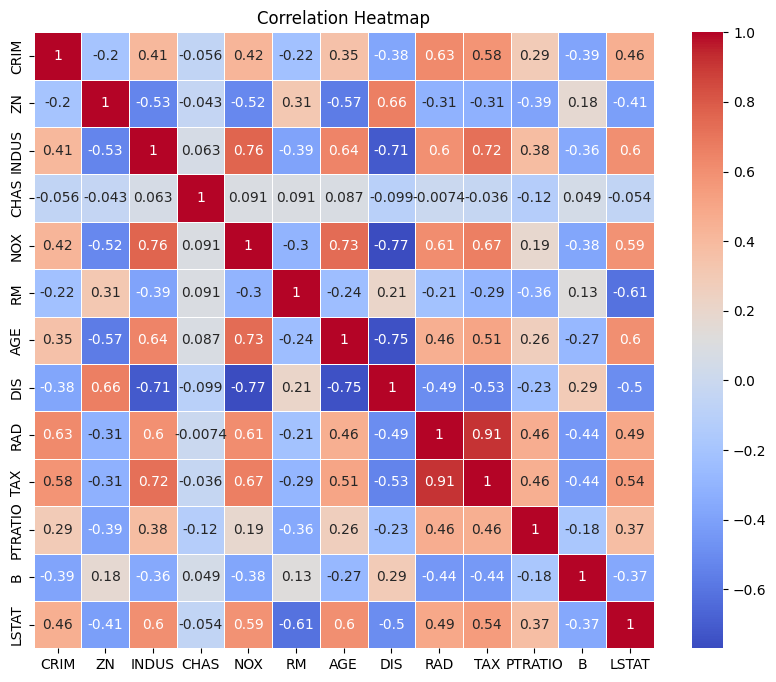

Correlation with target variable: CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64

Top three features :
 LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
dtype: float64

Correlation Threshold: 0.7

Feartures with High Correlation:
LSTAT    0.737663
dtype: float64

Number of selected variables: 10
Number of eliminated variables: 3


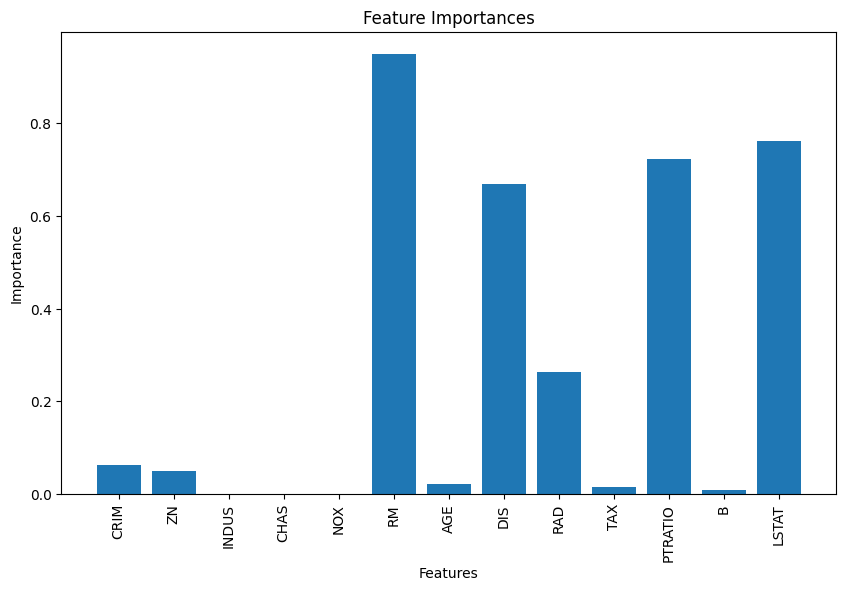

In [39]:
#Q01
#load relevent libraries and the data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

df = pd.read_csv('housing.csv', header = None)  #read the BostonHousing.csv file
df = df[0].str.split(expand = True)
df = df.astype(float)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names
#print(df)

feature_col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
#extract the feature values and target value separetly
X = df[feature_col]
y = df['MEDV']

#print(X)
#print(y)

#Q02
#use person correlation to find correlation between features
correlation_matrix = X.corr(method='pearson')
#print(correlation_matrix)
#draw the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

#Q03
#correlation with target variable
data = pd.concat([X,y], axis = 1)
correlation_with_target = data.drop(columns=['MEDV']).corrwith(data['MEDV'])
print("Correlation with target variable:", correlation_with_target)

#Q04
#Select top three features
sorted_correlations = correlation_with_target.abs().sort_values(ascending = False)
top_three_features = sorted_correlations.head(3)
correlation_threshold = 0.7
print("\nTop three features :\n", top_three_features)
print("\nCorrelation Threshold:", correlation_threshold)
high_correlation_features = top_three_features[top_three_features > correlation_threshold]
print("\nFeartures with High Correlation:")
print(high_correlation_features)

#Q05
#Initialize Lasso regression model
Lasso = Lasso(alpha = 1.0)
Lasso.fit(X,y)
selected_variables = X.columns[Lasso.coef_ != 0]

eliminated_variables = X.columns[Lasso.coef_ == 0]

print("\nNumber of selected variables:",len(selected_variables))
print("Number of eliminated variables:",len(eliminated_variables))

#Q06

feature_importance = np.abs(Lasso.coef_)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation = 90)
plt.show()